In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# STORE DATASET

# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## Convert date column to datetime format.

In [2]:
# using Adam's acquire file to get the data
df = get_store_data()
df.head(3)

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [3]:
# converting the sale_date to pandas datetime format
# could attempt to define the format for faster processing
df.sale_date = pd.to_datetime(df.sale_date)

In [4]:
df = df.set_index("sale_date").sort_index()

In [5]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


- looks good

In [6]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Plot the distribution of sale_amount and item_price.

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

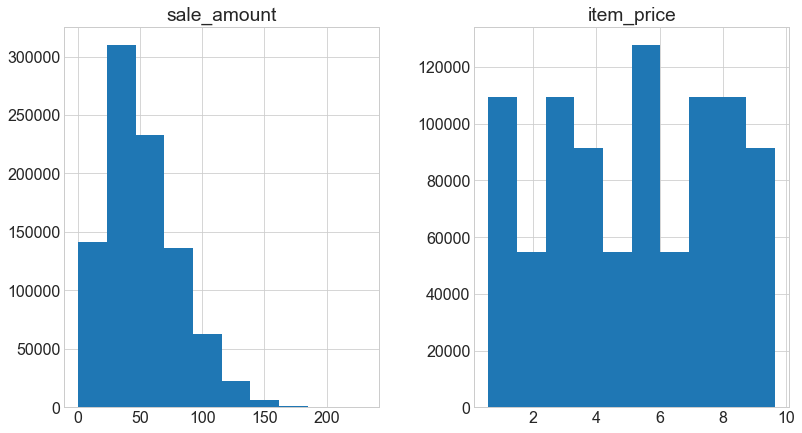

In [7]:
df[['sale_amount','item_price']].hist()

## Set the index to be the datetime variable.

In [8]:
# see above

## Add a 'month' and 'day of week' column to your dataframe.

In [9]:
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()

## Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [10]:
df.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday


In [11]:
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [12]:
# def prep_store_data(df):
#     # Convert date column to datetime format
#     df.sale_date = pd.to_datetime(df.sale_date)
#     # Set the index to be the datetime variable.
#     df = df.set_index("sale_date").sort_index()
#     # Plot the distribution of sale_amount and item_price
#     df[['sale_amount','item_price']].hist()
#     # Add a 'month' and 'day of week' column to your dataframe.
#     df['month'] = df.index.month_name()
#     df['day'] = df.index.day_name()
#     # Add a 'sales_total' column, which is a derived from sale_amount (total items) and item_price
#     df['sales_total'] = df.sale_amount * df.item_price    
#     return df

In [13]:
from prepare import prep_store_data

In [14]:
df = get_store_data()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,21.0,619014,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,9,TX,78221,December,Sunday,87.57
2017-12-31 00:00:00+00:00,32.0,620840,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,10,TX,78231,December,Sunday,133.44
2017-12-31 00:00:00+00:00,55.0,622666,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,December,Sunday,285.45


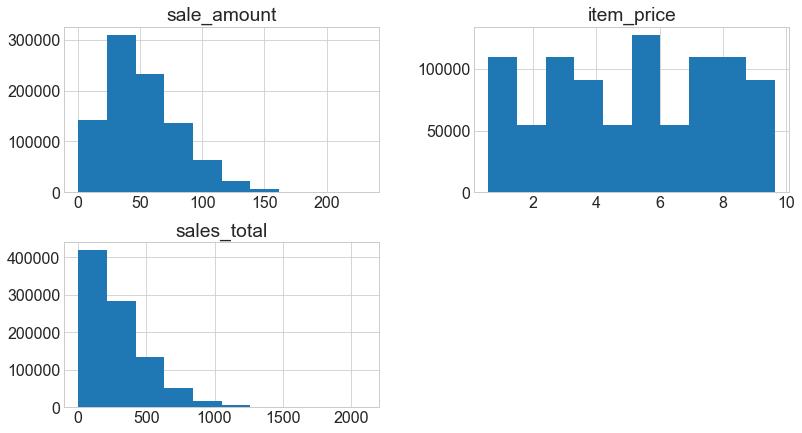

In [15]:
prep_store_data(df)

# OPS DATASET

**Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:**

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
ops = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
ops.shape

(4383, 5)

In [18]:
ops.Date.max(), ops.Date.min()

('2017-12-31', '2006-01-01')

## Convert date column to datetime format.

In [19]:
ops.Date = pd.to_datetime(ops.Date)

## Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind+Solar'}>, <AxesSubplot:>]],
      dtype=object)

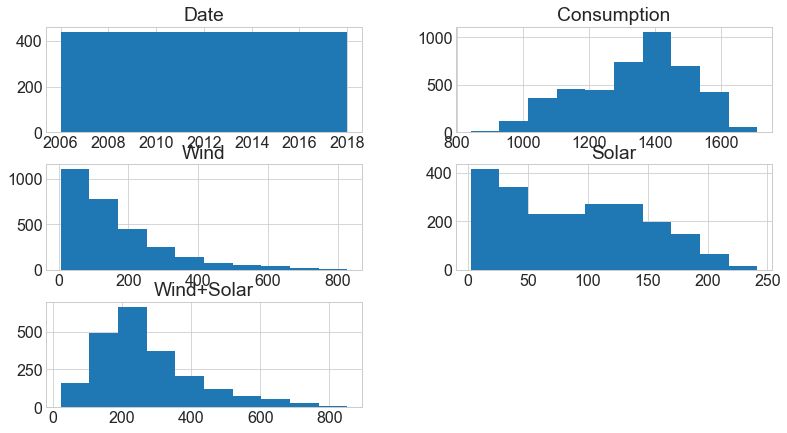

In [20]:
# ops[['Wind','Solar','Wind+Solar']].hist()
ops.hist()

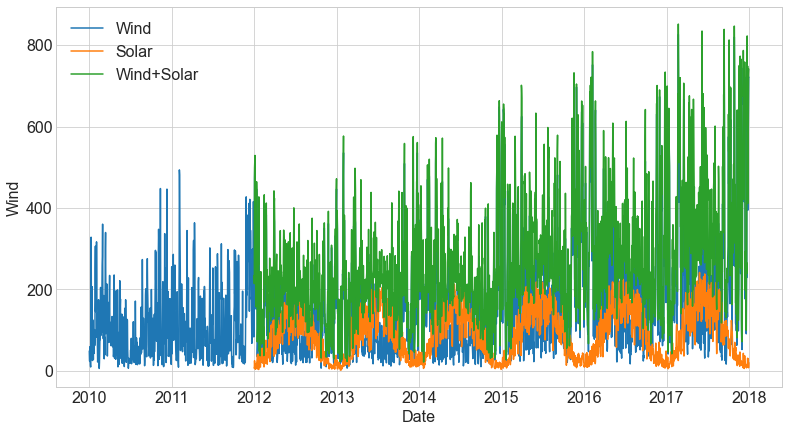

In [21]:
sns.lineplot(data = ops, x='Date', y='Wind', label = 'Wind')
sns.lineplot(data = ops, x='Date', y='Solar', label = 'Solar')
sns.lineplot(data = ops, x='Date', y='Wind+Solar', label = 'Wind+Solar')
plt.legend()

## Set the index to be the datetime variable.

In [22]:
ops = ops.set_index("Date").sort_index()

In [23]:
ops.head(1)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN


## Add a month and a year column to your dataframe.

In [24]:
ops['year'] = ops.index.year
ops['month'] = ops.index.month_name()

In [25]:
ops.head(1)

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,January


## Fill any missing values.

In [26]:
ops.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
year              0
month             0
dtype: int64

In [27]:
ops = ops.fillna(0)

In [28]:
ops.head()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,2006,January
2006-01-02,1380.521,0.0,0.0,0.0,2006,January
2006-01-03,1442.533,0.0,0.0,0.0,2006,January
2006-01-04,1457.217,0.0,0.0,0.0,2006,January
2006-01-05,1477.131,0.0,0.0,0.0,2006,January


## Make sure all the work that you have done above is reproducible. 

In [29]:
# def prep_ops_data():
#     # Acquire the raw ops data
#     df = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
#     # Convert date column to datetime format.
#     df.Date = pd.to_datetime(df.Date)
#     # Set the index to be the datetime variable.
#     df = df.set_index("Date").sort_index()
#     # Plot the distribution of each of your variables.
#     df.hist()
#     # Add a month and a year column to your dataframe
#     df['year'] = df.index.year
#     df['month'] = df.index.month_name()
#     # Fill any missing values
#     df = df.fillna(0)
#     return df

In [30]:
from acquire import prep_ops_data

ImportError: cannot import name 'prep_ops_data' from 'acquire' (/Users/brianclements/codeup-data-science/time_series_exercises/acquire.py)

In [ ]:
temp_df = prep_ops_data()
temp_df.head()